## **Sum of absolute differences (SAD)**

In [1]:
import cv2
import numpy as np

def template_matching_sad(src, temp):
    h, w = src.shape
    ht, wt = temp.shape

    score = np.empty((h-ht, w-wt))

    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            diff = np.abs(src[dy:dy + ht, dx:dx + wt] - temp)
            score[dy, dx] = diff.sum()

    pt = np.unravel_index(score.argmin(), score.shape)

    return (pt[1], pt[0])


def main():
    img = cv2.imread("./Lenna.png")
    temp = cv2.imread("./Lenna_mata.png")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape

    pt = template_matching_sad(gray, temp)

    #match = cv2.matchTemplate(gray, temp, cv2.TM_SQDIFF_NORMED)
    #min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    #pt = min_pt


    cv2.rectangle(img, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0,0,200), 3)
    cv2.imwrite("output.png", img)


if __name__ == "__main__":
    main()

## **Sum of square differences (SSD)**

Sum of square differences (SSD): TM_SQDIFF
An interesting feature of the SAD metric is that it doesn't penalize really big differences any more than a bunch of really small differences. Let's say we want to compute d(a, b) and d(a, c) with the following vectors:

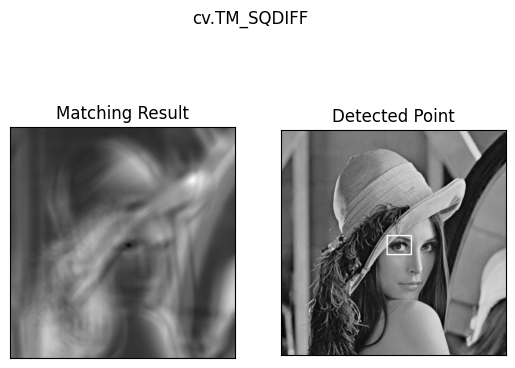

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/Lenna.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('/content/Lenna_mata.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
#methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
#            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
methods = ['cv.TM_SQDIFF']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()